In [1]:
from pathlib import Path
from pku_autonomous_driving import io,util,improc

In [2]:
train = io.load_train_data(max_num=32)
test = io.load_test_data()
train.head()

,ImageId,PredictionString
0,ID_8a6e65317,16 0.254839 -2.57534 -3.10256 7.96539 3.20066 ...
1,ID_337ddc495,66 0.163988 0.192169 -3.12112 -3.17424 6.55331...
2,ID_a381bf4d0,43 0.162877 0.00519276 -3.02676 2.1876 3.53427...
3,ID_7c4a3e0aa,43 0.126957 -3.04442 -3.10883 -14.738 24.6389 ...
4,ID_8b510fad6,37 0.16017 0.00862796 -3.0887 -3.04548 3.4977 ...


In [4]:
inp = train['PredictionString'][0]
print('Example input:\n', inp)
print()
print('Output:\n', util.str2coords(inp))

Example input:
 16 0.254839 -2.57534 -3.10256 7.96539 3.20066 11.0225 56 0.181647 -1.46947 -3.12159 9.60332 4.66632 19.339 70 0.163072 -1.56865 -3.11754 10.39 11.2219 59.7825 70 0.141942 -3.1395 3.11969 -9.59236 5.13662 24.7337 46 0.163068 -2.08578 -3.11754 9.83335 13.2689 72.9323

Output:
 [{'id': 16, 'yaw': 0.254839, 'pitch': -2.57534, 'roll': -3.10256, 'x': 7.96539, 'y': 3.20066, 'z': 11.0225}, {'id': 56, 'yaw': 0.181647, 'pitch': -1.46947, 'roll': -3.12159, 'x': 9.60332, 'y': 4.66632, 'z': 19.339}, {'id': 70, 'yaw': 0.163072, 'pitch': -1.56865, 'roll': -3.11754, 'x': 10.39, 'y': 11.2219, 'z': 59.7825}, {'id': 70, 'yaw': 0.141942, 'pitch': -3.1395, 'roll': 3.11969, 'x': -9.59236, 'y': 5.13662, 'z': 24.7337}, {'id': 46, 'yaw': 0.163068, 'pitch': -2.08578, 'roll': -3.11754, 'x': 9.83335, 'y': 13.2689, 'z': 72.9323}]


[[3.69431798e+04 2.23156449e+04 1.10225000e+01]
 [5.47414655e+04 3.69640063e+04 1.93390000e+01]
 [1.24751770e+05 1.06880689e+05 5.97825000e+01]
 [1.96008501e+04 4.53581965e+04 2.47337000e+01]
 [1.45642635e+05 1.29418597e+05 7.29323000e+01]]


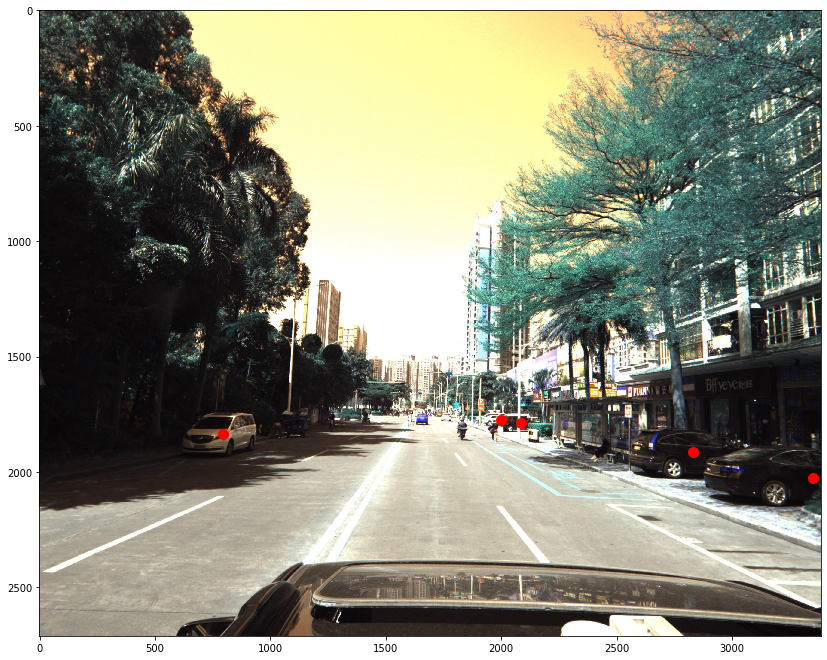

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,14))
plt.imshow(io.load_image(train['ImageId'][0]))
plt.scatter(*util.get_img_coords(train['PredictionString'][0]), color='red', s=100);

[[3.69431798e+04 2.23156449e+04 1.10225000e+01]
 [5.47414655e+04 3.69640063e+04 1.93390000e+01]
 [1.24751770e+05 1.06880689e+05 5.97825000e+01]
 [1.96008501e+04 4.53581965e+04 2.47337000e+01]
 [1.45642635e+05 1.29418597e+05 7.29323000e+01]]
img.shape (700, 1600, 3) std: 0.2870588
mask.shape (87, 200) std: 0.01694915
regr.shape (87, 200, 7) std: 0.0071668467


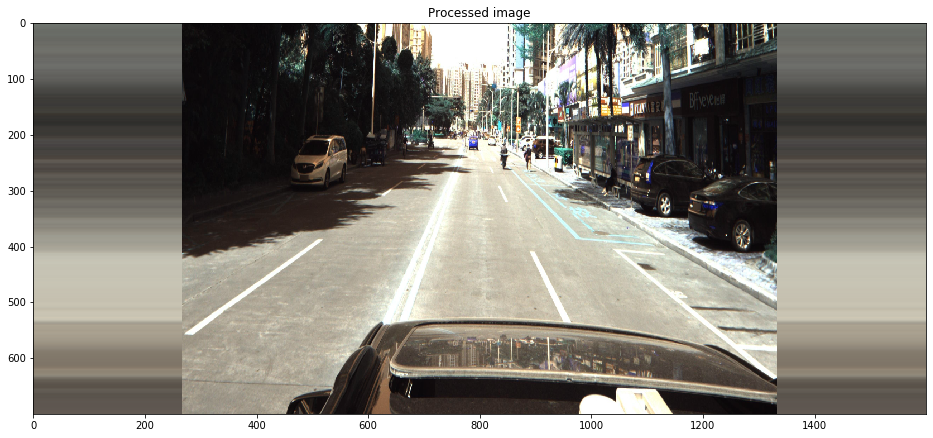

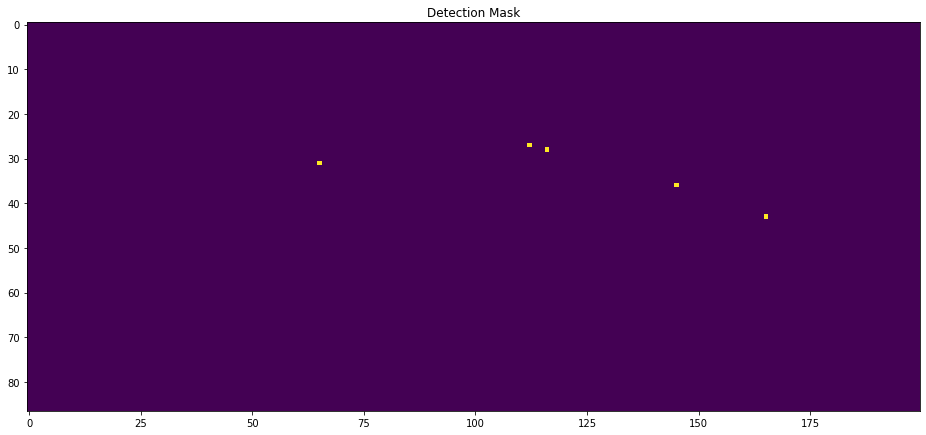

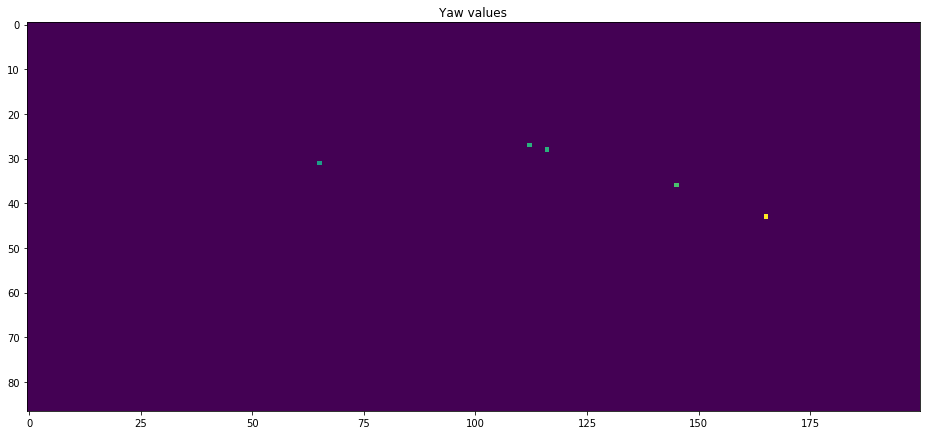

In [11]:
import numpy as np

img0 = io.load_image(train['ImageId'][0])
img = improc.preprocess_image(img0)

mask, regr = improc.get_mask_and_regr(img0, train['PredictionString'][0])

print('img.shape', img.shape, 'std:', np.std(img))
print('mask.shape', mask.shape, 'std:', np.std(mask))
print('regr.shape', regr.shape, 'std:', np.std(regr))

plt.figure(figsize=(16,16))
plt.title('Processed image')
plt.imshow(img)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Detection Mask')
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,16))
plt.title('Yaw values')
plt.imshow(regr[:,:,-2])
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from pku_autonomous_driving.dataset import CarDataset

df_train, df_dev = train_test_split(train, test_size=0.08, random_state=63)
df_test = test

# Create dataset objects
train_dataset = CarDataset(df_train)
dev_dataset = CarDataset(df_dev)
test_dataset = CarDataset(df_test)

[[4.57148372e+04 1.07190566e+05 6.12945000e+01]
 [2.22775422e+04 4.48189720e+04 2.42811000e+01]
 [2.72713736e+04 2.54053563e+04 1.30173000e+01]
 [8.32094039e+04 6.11613872e+04 3.25121000e+01]
 [1.31448193e+05 1.03901855e+05 5.69277000e+01]
 [1.38350593e+05 1.22951537e+05 6.88523000e+01]
 [1.30893822e+04 3.81433027e+04 2.08045000e+01]
 [6.21528051e+04 1.34246652e+05 7.65821000e+01]
 [6.55132666e+04 1.32092339e+05 7.53533000e+01]
 [3.13509389e+04 5.23566765e+04 2.89120000e+01]
 [7.91396110e+04 6.05170108e+04 3.25549000e+01]
 [3.16127047e+05 2.77292396e+05 1.55397000e+02]]


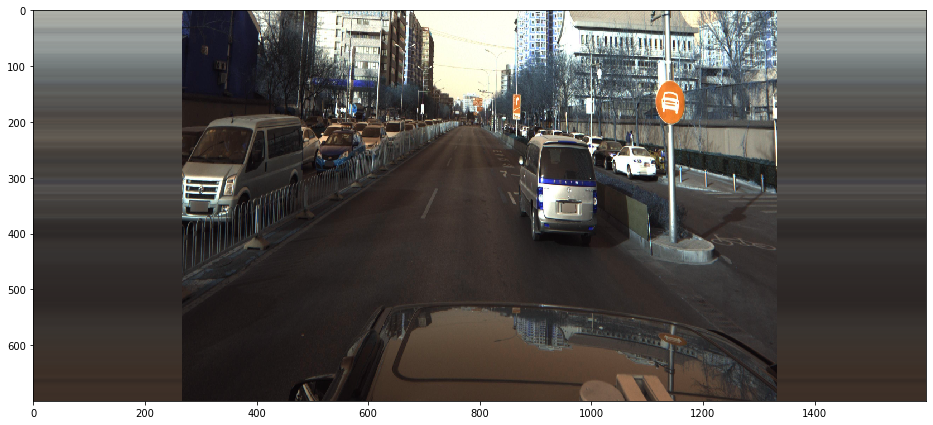

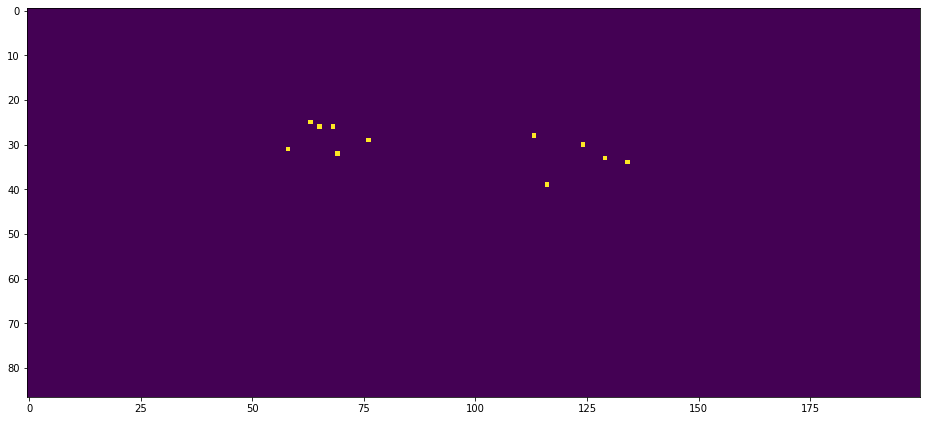

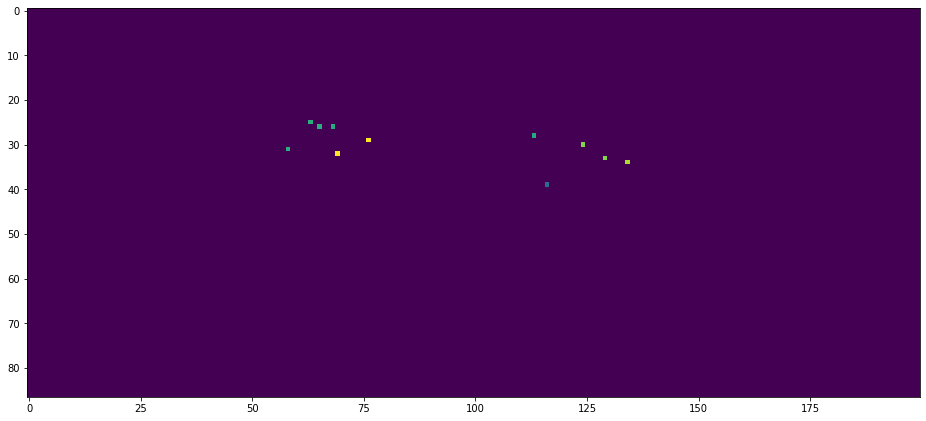

In [13]:
from pku_autonomous_driving import dataset
img, mask, regr = train_dataset[0]

plt.figure(figsize=(16,16))
plt.imshow(np.rollaxis(img, 0, 3))
plt.show()

plt.figure(figsize=(16,16))
plt.imshow(mask)
plt.show()

plt.figure(figsize=(16,16))
plt.imshow(regr[-2])
plt.show()

In [14]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1

# Create data generators - they will produce batches
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
dev_loader = DataLoader(dataset=dev_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)
test_loader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

In [15]:
import importlib
#imortlib.reload(resnet)
from pku_autonomous_driving import resnet
base_model = resnet.resnext50_32x4d(pretrained=False)
base_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [16]:
import importlib
#importlib.reload(centernet)

from pku_autonomous_driving import centernet
import torch
from torch import optim
from torch.optim import lr_scheduler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

n_epochs = 8

model = centernet.CentResnet(base_model, 8, device).to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
#optimizer =  RAdam(model.parameters(), lr = 0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=max(n_epochs, 10) * len(train_loader) // 3, gamma=0.1)

cpu


In [17]:
model

CentResnet(
  (base_model): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample):

In [18]:
img_batch = torch.randn((1,3,700,1600))

In [19]:
test = model(img_batch.to(device))

In [20]:
from tqdm import tqdm_notebook as tqdm

i = 0
for batch_idx, (img_batch, mask_batch, regr_batch) in enumerate(tqdm(train_loader)):
    print(img_batch.shape)
    print(mask_batch.shape)
    print(regr_batch.shape)
    i+=1
    if i>1:
        break 

/Users/argon/Library/Caches/pypoetry/virtualenvs/pku-autonomous-driving-py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


[[2.81150614e+04 2.21151599e+04 1.05721000e+01]
 [4.31444698e+04 3.68785386e+04 1.89298000e+01]
 [4.99763334e+04 4.44242698e+04 2.35687000e+01]
 [5.39093277e+03 1.67463830e+04 7.98033000e+00]
 [2.66785053e+04 5.15235844e+04 2.87715000e+01]
 [4.10033159e+04 6.49795702e+04 3.62367000e+01]
 [7.52312935e+04 9.16297807e+04 5.16736000e+01]
 [1.92361117e+05 2.18039682e+05 1.24898000e+02]
 [7.05032694e+04 6.48783066e+04 3.47659000e+01]
 [2.38406551e+04 5.56776611e+04 3.04061000e+01]
 [3.23867925e+05 3.30859462e+05 1.90099000e+02]
 [1.37593674e+05 1.72363645e+05 9.82640000e+01]
 [1.20689974e+05 1.16281585e+05 6.56278000e+01]
 [5.80162368e+04 8.56890733e+04 4.85182000e+01]]
torch.Size([1, 3, 700, 1600])
torch.Size([1, 87, 200])
torch.Size([1, 7, 87, 200])
[[5.71319586e+03 5.85877322e+04 3.43638000e+01]
 [3.23961855e+04 9.63256916e+04 5.59251000e+01]
 [3.27883110e+04 7.37032926e+04 4.24959000e+01]
 [1.91938147e+04 3.54860834e+04 1.90819000e+01]
 [4.57189674e+04 6.34513610e+04 3.53751000e+01]
 [7.

In [21]:
n_epochs = 1

In [22]:
%%time
import pandas as pd
import gc
from pku_autonomous_driving import train
from pku_autonomous_driving import const
importlib.reload(train)
importlib.reload(const)


history = pd.DataFrame()

for epoch in range(n_epochs):
    #torch.cuda.empty_cache()
    gc.collect()
    train.train(model, optimizer, exp_lr_scheduler, train_loader, epoch, device, history)
    train.evaluate(model, dev_loader, epoch, device, history)

[[7.15216442e+03 2.08833391e+04 1.04129000e+01]
 [1.95902941e+04 3.25257092e+04 1.75274000e+01]
 [3.40844325e+04 4.69872585e+04 2.56852000e+01]
 [5.71306850e+04 7.19890648e+04 4.03377000e+01]
 [1.24431228e+05 1.38974327e+05 7.89111000e+01]
 [6.74345204e+04 6.02858960e+04 3.30856000e+01]
 [8.03594588e+04 9.68817073e+04 5.46817000e+01]
 [9.86475838e+04 1.14716841e+05 6.50065000e+01]
 [1.27250820e+05 1.45250745e+05 8.23865000e+01]
 [6.77818188e+04 6.23699543e+04 3.43869000e+01]
 [1.31330290e+05 1.26508288e+05 7.13639000e+01]]
[[4.56898460e+04 5.77035772e+04 3.14339000e+01]
 [5.84965012e+04 9.78145705e+04 5.48175000e+01]
 [7.38308924e+04 9.69888880e+04 5.40320000e+01]
 [8.35777482e+04 1.12261770e+05 6.37140000e+01]
 [6.93863128e+04 1.28062661e+05 7.22694000e+01]
 [3.45994057e+03 1.11194443e+05 6.29879000e+01]
 [1.18988509e+05 1.83499961e+05 1.04288000e+02]
 [1.07535291e+05 1.66977945e+05 9.40015000e+01]]
[[4.57148372e+04 1.07190566e+05 6.12945000e+01]
 [2.22775422e+04 4.48189720e+04 2.4281

In [23]:
torch.save(model.state_dict(), './resnext50.pth')

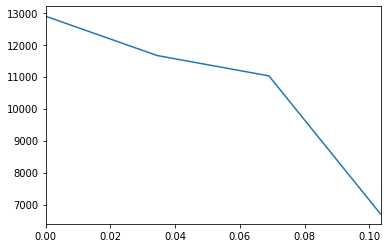

In [24]:
#history['train_loss'].iloc[100:].plot();
history['train_loss'].iloc[:].plot();

In [25]:
history

,train_loss,dev_loss,mask_loss,regr_loss
0.000000,12888.377930,276999.375,276973.34375,26.044821
0.034483,11659.373047,NaN,NaN,NaN
0.068966,11024.552734,NaN,NaN,NaN
0.103448,6709.332520,NaN,NaN,NaN


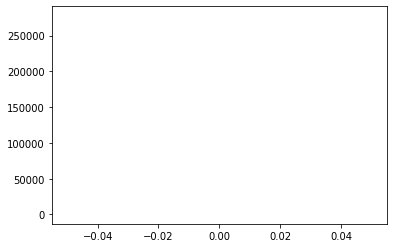

In [26]:
series1 = history.dropna()['mask_loss']
plt.plot(series1.index, series1 ,label = 'mask loss');
series2 = history.dropna()['regr_loss']
plt.plot(series2.index, 30*series2,label = 'regr loss');
series3 = history.dropna()['dev_loss']
plt.plot(series3.index, series3,label = 'dev loss');
plt.show()

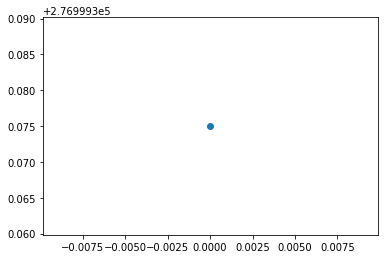

In [27]:
series = history.dropna()['dev_loss']
plt.scatter(series.index, series);

[[6.97766571e+03 3.67374723e+04 1.99233000e+01]
 [2.83234620e+04 4.94569840e+04 2.71017000e+01]
 [7.32143340e+04 7.21842164e+04 3.96330000e+01]
 [4.69834538e+04 5.06838795e+04 2.79255000e+01]
 [1.11648444e+05 1.30394457e+05 7.29706000e+01]
 [1.14904097e+05 1.17190535e+05 6.48305000e+01]]


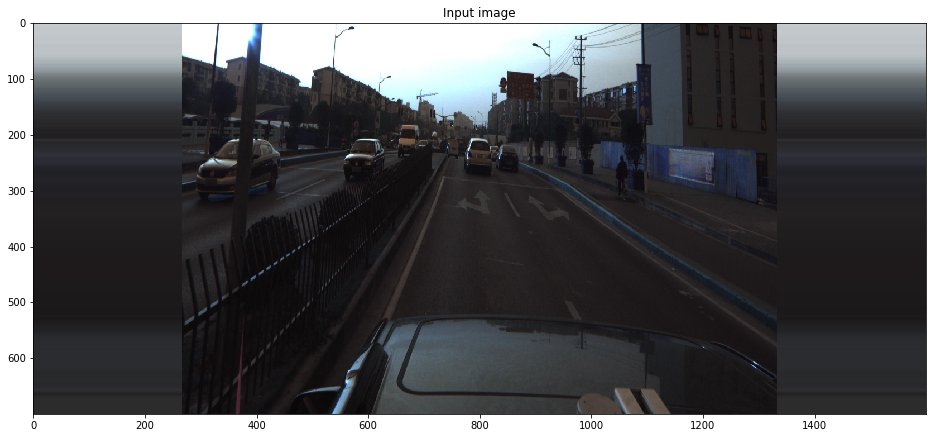

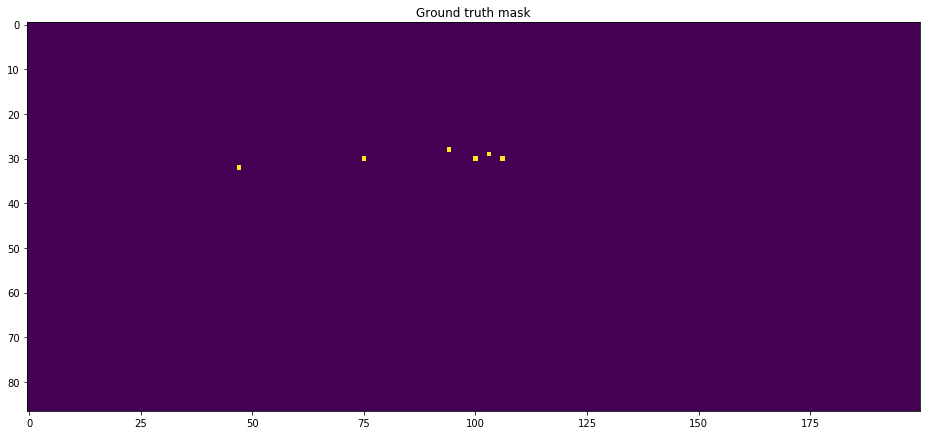

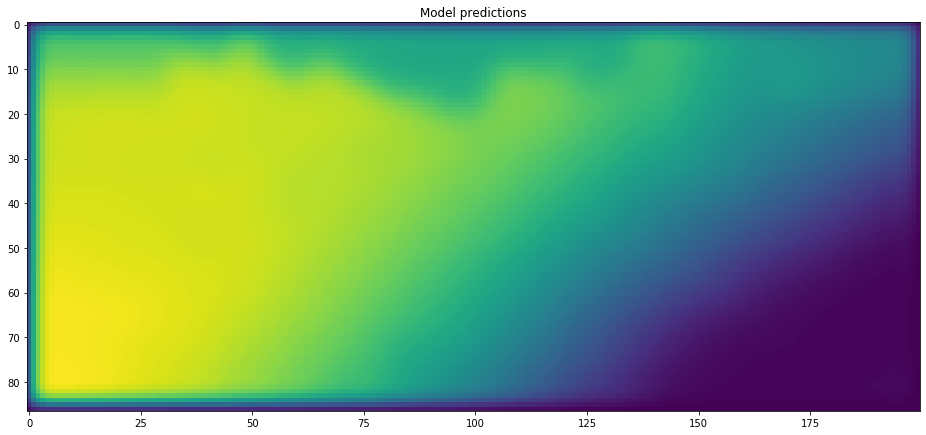

[[ 1.297697    3.0977793   4.2689953  ...  2.7176661   1.9922867
   0.92087495]
 [ 2.8405714   6.01262     8.095611   ...  5.3074403   3.983591
   1.9894677 ]
 [ 3.7588735   7.7531414  10.317638   ...  6.7595844   5.1004834
   2.5504074 ]
 ...
 [ 4.3527675   8.726699   11.38642    ... -0.08429177 -0.1671197
  -0.24385399]
 [ 2.5175965   5.182498    6.8001213  ... -0.19195856 -0.21113388
  -0.24966969]
 [ 0.74809736  1.7787762   2.3798726  ... -0.2574607  -0.24628544
  -0.19314459]]


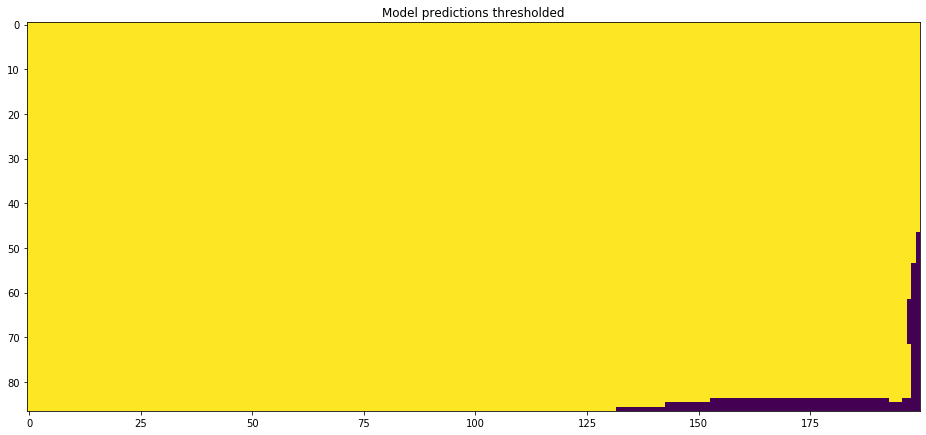

In [28]:
img, mask, regr = dev_dataset[0]

plt.figure(figsize=(16,16))
plt.title('Input image')
plt.imshow(np.rollaxis(img, 0, 3))
plt.show()

plt.figure(figsize=(16,16))
plt.title('Ground truth mask')
plt.imshow(mask)
plt.show()

output = model(torch.tensor(img[None]).to(device))
logits = output[0,0].data.cpu().numpy()

plt.figure(figsize=(16,16))
plt.title('Model predictions')
plt.imshow(logits)
plt.show()

print(logits)
plt.figure(figsize=(16,16))
plt.title('Model predictions thresholded')
plt.imshow(logits > 0)
plt.show()

In [31]:
## Simple test of probabilities
act = torch.nn.Sigmoid()
logtens = torch.from_numpy(logits)
probs = act(logtens)
probs = probs[probs>0]
print(probs)

tensor([0.7854, 0.9568, 0.9862,  ..., 0.4360, 0.4387, 0.4519])


In [32]:
from pku_autonomous_driving import util, io
importlib.reload(util)
importlib.reload(io)

from pku_autonomous_driving.util import extract_coords
from pku_autonomous_driving.io import load_image
import numpy as np

gc.collect()

for idx in range(4):
    img, mask, regr = dev_dataset[idx]
    
    output = model(torch.tensor(img[None]).to(device)).data.cpu().numpy()
    coords_pred = extract_coords(output[0])
    coords_true = extract_coords(np.concatenate([mask[None], regr], 0))
    
    img = load_image(df_dev['ImageId'].iloc[idx])
    
    fig, axes = plt.subplots(1, 2, figsize=(30,30))
    axes[0].set_title('Ground truth')
    axes[0].imshow(visualize(img, coords_true))
    axes[1].set_title('Prediction')
    axes[1].imshow(visualize(img, coords_pred))
    plt.show()

[[6.97766571e+03 3.67374723e+04 1.99233000e+01]
 [2.83234620e+04 4.94569840e+04 2.71017000e+01]
 [7.32143340e+04 7.21842164e+04 3.96330000e+01]
 [4.69834538e+04 5.06838795e+04 2.79255000e+01]
 [1.11648444e+05 1.30394457e+05 7.29706000e+01]
 [1.14904097e+05 1.17190535e+05 6.48305000e+01]]


NameError: name 'rotate' is not defined